In [1]:
from maelzel.core import *
from maelzel import scoring


In [2]:
cfg = getConfig()
cfg['show.horizontalSpacing'] = 'large'

Chain([3E:0.75♩:gliss=True, 3E<, 3A-:0.167♩:gliss=True, 3G+, 3A<:gliss=True, 3G+:0.083♩:gliss=True, 3Ab-12, 3C:0.083♩])
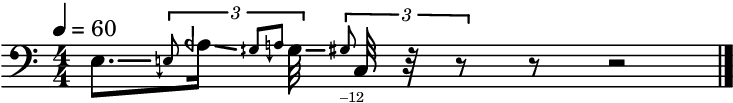

In [3]:
chain = Chain([
    Note("3E", F(3, 4), gliss=True),
    Note("3E<", 0),
    Note("3A-", 0.917-0.75, gliss=True),
    Note("3Ab-", 0),
    Note("3A<", 0, gliss=True),
    Note("3G+", 1-0.917, gliss=True),
    Note("3Ab-12", 0),
    Note("3C", 0.083)
    
])
chain

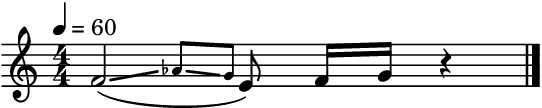

[«4Fgliss 0:2 2♩ spanners=[Slur(kind=start, linetype=solid, nestingLevel=1, uuid=mz37vfb1)]»,
 «4G#gliss 2:grace»,
 «4G 2:grace spanners=[Slur(kind=end, linetype=solid, nestingLevel=1, uuid=mz37vfb1)]»,
 «4E 2:2.5 1/2♩»,
 «4F 2.5:2.75 1/4♩ spanners=[Beam(kind=start, linetype=solid, nestingLevel=1, uuid=apz5y5mv)]»,
 «4G 2.75:3 1/4♩ spanners=[Beam(kind=end, linetype=solid, nestingLevel=1, uuid=apz5y5mv)]»]

In [4]:
events = [
    "4F:2:gliss",
    "4Ab:0:gliss",
    "4G:0",
    "e4:0.5",
    "f4:0.25",
    "g4:0.25",
    
]
chain = Chain(events)
chain[0].addSpanner('slur', chain[2])
chain[4].addSpanner('beam', chain[5])
# chain[5].addSymbol('breath')
chain.write('~/tmp/slur.ly')
chain.show()
evs = chain.scoringEvents()
evs

Chain([4F:2♩:gliss=True:symbols=[Slur(anchor=ref(Note), kind=start, linetype=solid, partnerSpanner=ref(Slur), uuid=731thedd)], 4G#:symbols=[Slur(anchor=ref(Note), kind=end, linetype=solid, partnerSpanner=ref(Slur), uuid=731thedd)], 4G, 4E:0.5♩, 4F:0.25♩:symbols=[Beam(anchor=ref(Note), kind=start, linetype=solid, partnerSpanner=ref(Beam), uuid=5sdm247b)], 4G:0.25♩:symbols=[Beam(anchor=ref(Note), kind=end, linetype=solid, partnerSpanner=ref(Beam), uuid=5sdm247b)]])
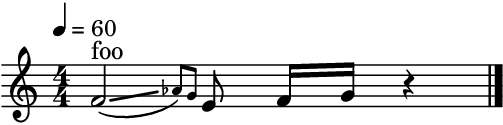

In [13]:
events = [
    "4F:2:gliss:label=foo",
    "4Ab:0",    
    "4G:0",
    "e4:0.5",
    "f4:0.25",
    "g4:0.25",
    
]
chain = Chain(events)
chain[0].addSpanner('slur', chain[1])
chain[4].addSpanner('beam', chain[5])
chain

## 1

Chain([4F:1♩:gliss=True, 4F~:1.5♩, 4F:0.7♩:gliss=True, 4G])
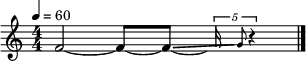

In [13]:
events = [
    "4F:1:gliss",
    "4F~:1.5", 
    "4F:0.7:gliss",
    "4G:0",
    #"e4:0.5",
    #"f4:0.25",
    #"g4:0.25",
    
]
chain = Chain(events)
#chain[2].addSymbol(symbols.Stem(hidden=True))
#chain[0].addSpanner('slur', chain[2])
chain

Chain([4F~:2♩, 4F:0.25♩:gliss=4A, 4F>:0.95♩:gliss=True, 4E+])
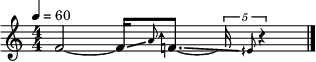

In [14]:
events = [
    "4F~:2",
    "4F:0.25:gliss=4a", 
    "4F+25:0.95:gliss",
    "4E+:0",
    #"e4:0.5",
    #"f4:0.25",
    #"g4:0.25",
    
]
chain = Chain(events)
#chain[2].addSymbol(symbols.Stem(hidden=True))
#chain[0].addSpanner('slur', chain[2])
chain

In [14]:
scoring.quant.measureSplitNotationsAtBeats(evs, (4, 4), 60)

[(TimeSpan(start=0, end=1), [«0.000:1.000 4F gliss tiedNext»]),
 (TimeSpan(start=1, end=2), [«1.000:2.000 4F gliss tiedPrev»]),
 (TimeSpan(start=2, end=3), [«2.000:grace 4G», «2.000:3.000 4E tiedNext»]),
 (TimeSpan(start=3, end=4), [«3.000:4.000 4E tiedPrev»])]

In [19]:
qs = chain.quantizedScore()
m0 = qs.parts[0].measures[0]

In [20]:
m0.groupTree()

[DurationGroup(1/1, 
   DurationGroup(1/1, 
     «0.000:1.000 4F tiedNext»
   )
   DurationGroup(1/1, 
     «1.000:2.000 4F gliss tiedPrev»
   )
   DurationGroup(1/1, 
     «2.000:grace 4G»
     «2.000:4.000 4E»
   )
 )]

In [21]:
m0.beats

[QuantizedBeat(divisions=(1,), assignedSlots=[0], notations=[«0.000:1.000 4F tiedNext»], beatDuration=1, beatOffset=0, quantizationError=0.00447213595499958, quantizationInfo=''),
 QuantizedBeat(divisions=(1,), assignedSlots=[0], notations=[«1.000:2.000 4F gliss tiedPrev»], beatDuration=1, beatOffset=1, quantizationError=0.00447213595499958, quantizationInfo=''),
 QuantizedBeat(divisions=(1, 1, 1, 1), assignedSlots=[0, 0], notations=[«2.000:grace 4G», «2.000:2.250 4E tiedNext», «2.250:2.500 4E tiedPrev tiedNext», «2.500:2.750 4E tiedPrev tiedNext», «2.750:3.000 4E tiedPrev tiedNext»], beatDuration=1, beatOffset=2, quantizationError=0.027354478173903407, quantizationInfo=''),
 QuantizedBeat(divisions=(1,), assignedSlots=[0], notations=[«3.000:4.000 4E tiedPrev»], beatDuration=1, beatOffset=3, quantizationError=0.00447213595499958, quantizationInfo='')]

Chain([4F:4♩, 4A:2.5♩:gliss=True, 4F:gliss=True, 4G, 4A:1♩, 4B:3♩, 5C#:3♩, 4F:3♩, 4A:2♩:gliss=True, 4F:gliss=True, …])
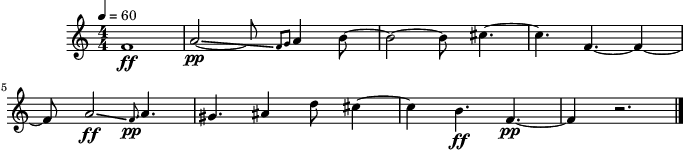

In [5]:
# Reset any active scorestruct to the default
setScoreStruct()

events = [
    "4F:4:ff",
    "4A:2.5:pp:gliss",
    "4F:0:gliss",    # dur=0 indicates a grace note
    "4G:0",
    "4A:1:pp",
    "4B:3",
    "5C#:3",
    "4F:3",
    "4A:2:ff:gliss",
    "4F:0:pp:gliss",
    "4A:1.5:pp",
    "4Ab:1.5",
    "4Bb:1",
    "5D:.5",
    "5C#:2",
    "4B:1.5:ff",
    "4F:2.5:pp"
]
chain = Chain(events)
chain.write('~/tmp/grace.ly')
chain

Chain([4F:4♩, 4A:2.5♩, 4F, 4A:1♩, 4B:3♩, 5C#:3♩, 4F:3♩, 4A:2♩, 4F, 4A:1.5♩, …])
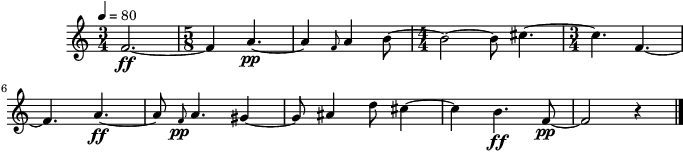

In [3]:
s = ScoreStruct(r'''
3/4, 80
5/8
.
4/4
3/4
''')
setScoreStruct(s)
chain


Chain([4F:4♩, 4A:2.5♩, 4F, 4A:1♩, 4B:3♩, 5C#:3♩, 4F:3♩, 4A:2♩, 4F, 4A:1.5♩, …])
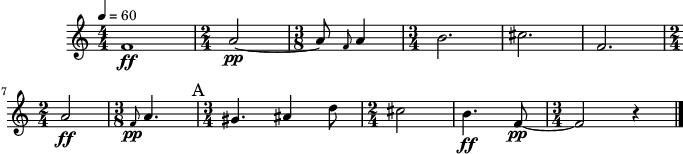

In [4]:
s2 = ScoreStruct(r'''
  4/4, 60
  2/4
  3/8
  3/4
  .
  .
  2/4
  3/8
  3/4,,A
  2/4
  .
  3/4
  4/4
  3/4
  4/4
  3/4
  2/4
  4/4
  .
  2/4,,B
  ''')

setScoreStruct(s2)
chain

Chain([4C:4♩, 4E, 4F:1♩])
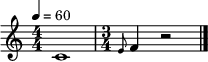

In [5]:
from maelzel.core import *

s = ScoreStruct(r'''
4/4
3/4
''')

setScoreStruct(s)

ch = Chain([
    "4C:4",
    "4E:0",
    "4F:1"
])

ch

In [6]:
s.beatToLocation(4)

(1, 0)

In [7]:
r = ch.render()
r.quantizedScore.dump()

Measure #0
Timesig: 4/4 (quarter=60)
  Ratio (1, 1)
    DurationGroup(1/1, 
  «0.000:4.000 4C properties={'resetEnharmonicSlots': True}»
)
Measure #1
Timesig: 3/4 (quarter=60)
  Ratio (1, 1)
    DurationGroup(1/1, 
  «0.000:grace 4E properties={'resetEnharmonicSlots': True}»
  «0.000:1.000 4F»
)
    DurationGroup(1/1, 
  «1.000:3.000 rest»
)
